In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import yfinance as yf
import pmdarima as pm

In [35]:
df = yf.Ticker('BTC-USD').history('Max')
df = df[['Close']]
df.head()

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [28]:
# def log_ret (price):
#     log_price = np.log(price)
#     return log_price.diff()

In [36]:
# df['LogRet'] = log_ret(df['Close'])

In [37]:
df.head()

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


<AxesSubplot:xlabel='Date'>

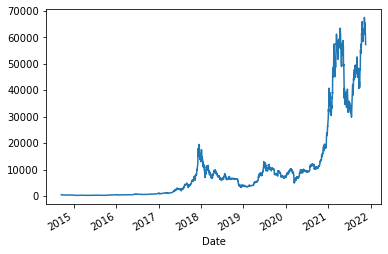

In [38]:
df['Close'].plot()

In [78]:
Ntest = 10
train =df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [79]:
model = pm.auto_arima(train,
                     error_action = 'ignore',
                     trace=True,
                     suppress_warnings= True,
                     maxiter = 10,
                     seasonal = False)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=43600.976, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=42741.783, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=43598.983, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=42427.704, Time=0.13 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=42218.527, Time=0.20 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=42106.893, Time=0.24 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=42050.873, Time=0.37 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=41787.180, Time=0.91 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=41787.701, Time=0.67 sec
 ARIMA(5,2,2)(0,0,0)[0] intercept   : AIC=41761.803, Time=0.94 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=41762.577, Time=0.80 sec
 ARIMA(5,2,3)(0,0,0)[0] intercept   : AIC=41748.581, Time=0.96 sec
 ARIMA(4,2,3)(0,0,0)[0] interce

In [80]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2606
Model:               SARIMAX(5, 2, 4)   Log Likelihood              -20849.340
Date:                Fri, 19 Nov 2021   AIC                          41718.681
Time:                        12:43:27   BIC                          41777.329
Sample:                             0   HQIC                         41739.929
                               - 2606                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6597      0.048    -13.714      0.000      -0.754      -0.565
ar.L2         -0.5266      0.041    -12.969      0.000      -0.606      -0.447
ar.L3         -0.8672      0.041    -21.278      0.000      -0.947      -0.787
ar.L4         -0.0368      0.014     -2.682      0.007      -0.064      -0.010
ar.L5          0.0465      0.011      4.270      0.000       0.025       0.068
ma.L1         -0.3647      0.046     -7.857      0.000      -0.456      -0.274
ma.L2         -0.0977      0.055     -1.775      0.076      -0.206       0.010
ma.L3          0.3152      0.050      6.283      0.000       0.217       0.414
ma.L4         -0.7923      0.040    -20.033      0.000      -0.870      -0.715
sigma2      5.553e+05   4766.773    116.492      0.000    5.46e+05    5.65e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):             60999.91
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):            5504.17   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
model.get_params()

{'maxiter': 10,
 'method': 'lbfgs',
 'order': (5, 2, 4),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

In [90]:
def plot_result(model, fulldata, train, test):
    params = model.get_params()
    d = params['order'][1]
    
    train_pred = model.predict_in_sample (start=d, end=-1)
    test_pred, confint = model.predict(n_periods = Ntest, return_conf_int = True)
    
    fig, ax = plt.subplots(figsize = (10, 5))
    ax.plot(fulldata.index, fulldata, label = 'data')
    ax.plot(train.index[d:], train_pred, label = 'fitted')
    ax.plot(test.index, test_pred, label = 'forecast')
    ax.fill_between(test.index,\
                   confint[:,0], confint[:,1],\
                   color = 'red', alpha =0.3)
    ax.legend()

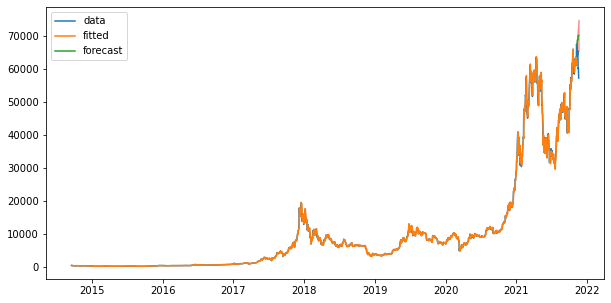

In [91]:
plot_result(model, df, train, test)

In [92]:
def plot_test(model, test):
    test_pred, confint = model.predict(n_preriods = Ntest, return_conf_int = True)
    
    fig, ax = plt.subplots(figsize = (10, 5))
    ax.plot(test.index, test, label = 'True')
    ax.plot(test.index, test_pred, label = 'forecast')
    ax.fill_between(test.index, \
                   confint[:,0], confint[:,-1],\
                   color = 'red', alpha=0.3)
    ax.legend()

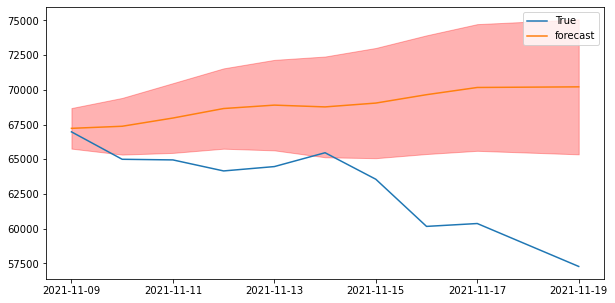

In [93]:
plot_test(model, test)

In [86]:
def rmse(y, t):
    return np.sqrt(np.mean((t-y)**2))

In [94]:
print("RMSE ARIMA:", rmse(model.predict(Ntest),test))
print("RMSE Naive:", rmse(train.iloc[-1],test))

ValueError: Unable to coerce to Series, length must be 1: given 10

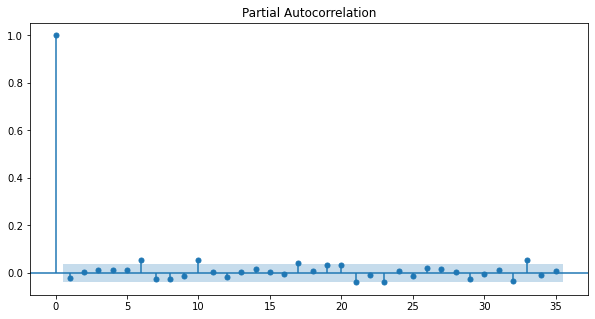

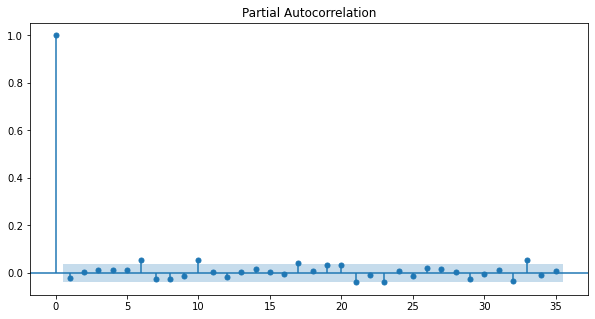

In [17]:
fig, ax = plt.subplots(figsize = (10, 5))
plot_pacf(df['LogRet'].dropna(),ax = ax)

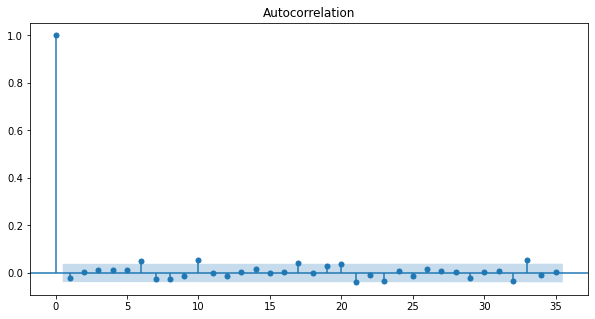

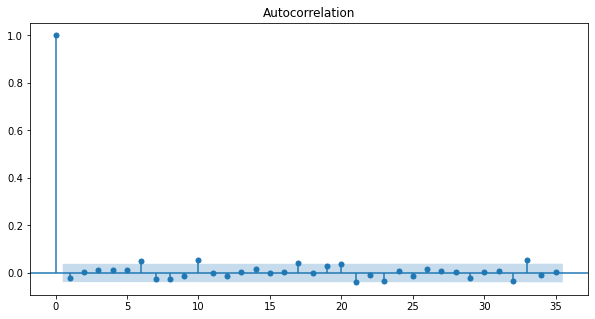

In [18]:
fig, ax = plt.subplots(figsize = (10, 5))
plot_acf(df['LogRet'].dropna(),ax = ax)